#Информация о датасете

Датасет представляет собой таблицу с 22676 записями и 12 колонками, в которой содержится информация о продаже квартир в Московском регионе. Структура данных следующая:

1. Price: Цена квартиры (в миллионах рублей).
2. Apartment type: Тип квартиры (например, "вторичное жилье").
3. Metro station: Ближайшая станция метро к объекту.
4. Minutes to metro: Время в минутах, необходимое для того, чтобы добраться до метро.
5. Region: Регион, в котором расположена квартира (например, "Московская область").
6. Number of rooms: Количество комнат в квартире.
7. Area: Общая площадь квартиры (в квадратных метрах).
8. Living area: Жилая площадь квартиры (в квадратных метрах).
9. Kitchen area: Площадь кухни (в квадратных метрах).
10. Floor: Этаж, на котором расположена квартира.
11. Number of floors: Общее количество этажей в здании.
12. Renovation: Состояние ремонта (например, "евроремонт", "без ремонта" и т.д.).

Каждая запись содержит непропущенные значения, что указывает на высокую полноту данных. Датасет может быть использован для исследований в области недвижимости, анализа цен, влияния расположения на стоимость жилья и других экономических исследований.

На основе этого датасета я буду предсказывать цену на квартиру (**Price**) по данным о ней.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

data

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,NaN,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,NaN,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,New building,Котельники,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


Проверим на наличие нулевых значений:

In [2]:
data.isnull().sum()

,0
Price,0
Apartment type,1
Metro station,14
Minutes to metro,0
Region,0
Number of rooms,0
Area,0
Living area,2
Kitchen area,10
Floor,0


Пропущенных значений не так много, поэтому можно просто удалить эти строки из датасета.

In [3]:
data = data.dropna()
data.isnull().sum()

,0
Price,0
Apartment type,0
Metro station,0
Minutes to metro,0
Region,0
Number of rooms,0
Area,0
Living area,0
Kitchen area,0
Floor,0


Матрица рассеяния для числовых значений

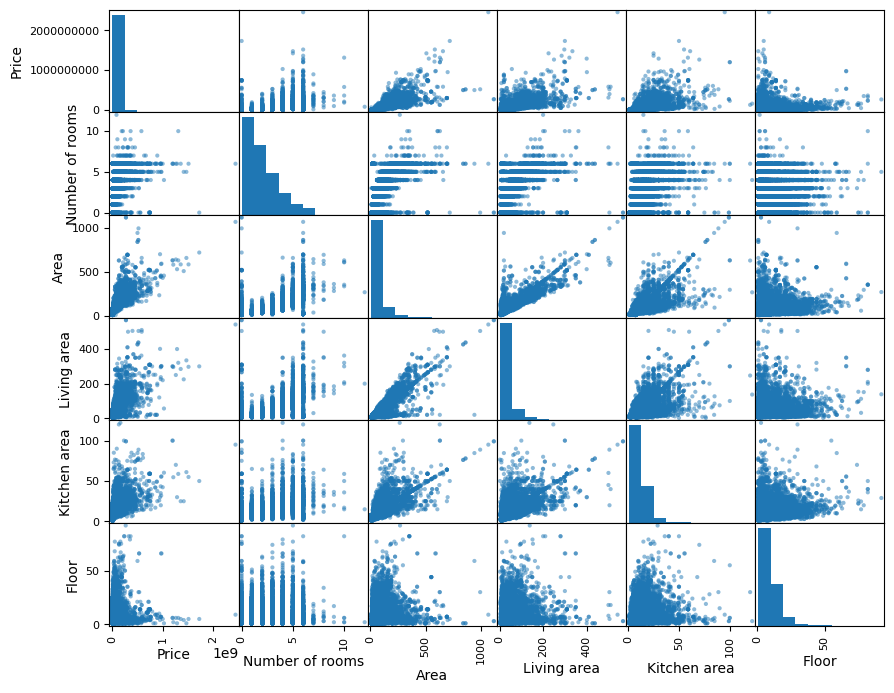

In [4]:
pd.plotting.scatter_matrix(data, figsize=(10, 8))
plt.show()

# Обработка категориальных значений

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22640 entries, 0 to 22674
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22640 non-null  float64
 1   Apartment type    22640 non-null  object 
 2   Metro station     22640 non-null  object 
 3   Minutes to metro  22640 non-null  object 
 4   Region            22640 non-null  object 
 5   Number of rooms   22640 non-null  float64
 6   Area              22640 non-null  float64
 7   Living area       22640 non-null  float64
 8   Kitchen area      22640 non-null  float64
 9   Floor             22640 non-null  float64
 10  Number of floors  22640 non-null  object 
 11  Renovation        22640 non-null  object 
dtypes: float64(6), object(6)
memory usage: 2.2+ MB


В датасете 6 столбцов имеют тип данны object, необходимо привести их к числовому типу данных


In [6]:
data["Minutes to metro"] = data["Minutes to metro"].astype(float)
data["Number of floors"] = data["Number of floors"].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22640 entries, 0 to 22674
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22640 non-null  float64
 1   Apartment type    22640 non-null  object 
 2   Metro station     22640 non-null  object 
 3   Minutes to metro  22640 non-null  float64
 4   Region            22640 non-null  object 
 5   Number of rooms   22640 non-null  float64
 6   Area              22640 non-null  float64
 7   Living area       22640 non-null  float64
 8   Kitchen area      22640 non-null  float64
 9   Floor             22640 non-null  float64
 10  Number of floors  22640 non-null  int64  
 11  Renovation        22640 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.2+ MB


<ipython-input-6-bc58857aa155>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Minutes to metro"] = data["Minutes to metro"].astype(float)
<ipython-input-6-bc58857aa155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Number of floors"] = data["Number of floors"].astype(int)




Выведем количество уникальных значений в каждом из этих столбцов

In [7]:
data['Apartment type'].unique()

array(['Secondary', 'New building'], dtype=object)

In [8]:
data['Metro station'].unique()

array([' Опалиха', ' Мякинино', ' Нахабино', ' Строгино',
       ' Красногорская', ' Тушинская', ' Аникеевка', ' Волоколамская',
       ' Павшино', ' Пенягино', ' Митино', ' Пятницкое шоссе',
       ' Чеховская', ' Арбатская', ' Фили', ' Белорусская',
       ' Кропоткинская', ' Спортивная', ' Алексеевская', ' Ростокино',
       ' Китай-город', ' ВДНХ', ' Динамо', ' Филатов Луг', ' Раменки',
       ' Минская', ' Аминьевская', ' Давыдково', ' Фрунзенская',
       ' Улица 1905 года', ' Кунцевская', ' Шелепиха', ' Молодёжная',
       ' Беговая', ' Бауманская', ' Славянский бульвар', ' Новокузнецкая',
       ' Парк Культуры', ' Смоленская', ' Пушкинская', ' Комсомольская',
       ' Серпуховская', ' Трубная', ' Народное Ополчение', ' Киевская',
       ' Технопарк', ' Преображенская площадь', ' Павелецкая',
       ' Красные ворота', ' Тверская', ' Петровский Парк', ' Аэропорт',
       ' Площадь Ильича', ' Краснопресненская', ' Курская',
       ' Третьяковская', ' Охотный ряд', ' Деловой центр

In [9]:
data['Region'].unique()

array(['Moscow region', 'Moscow'], dtype=object)

In [10]:
data['Renovation'].unique()

array(['Cosmetic', 'Without renovation', 'European-style renovation',
       'Designer'], dtype=object)

Для категориальных признаков применяем One-Hot Encoding.

In [11]:
data = pd.get_dummies(data, columns=["Apartment type", "Region", "Renovation"])

data = data.replace({False: 0, True: 1})

data

<ipython-input-11-e199802ca412>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({False: 0, True: 1})


,Price,Metro station,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Apartment type_New building,Apartment type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,6300000.0,Опалиха,6.0,1.0,30.60,11.1,8.5,25.0,25,0,1,0,1,1,0,0,0
2,11090000.0,Мякинино,14.0,1.0,44.70,16.2,13.1,10.0,25,0,1,0,1,1,0,0,0
4,6450000.0,Опалиха,6.0,1.0,37.70,15.2,4.0,5.0,5,0,1,0,1,0,0,0,1
5,7150000.0,Опалиха,6.0,1.0,38.40,18.0,8.0,8.0,18,0,1,0,1,0,0,1,0
6,7400000.0,Нахабино,11.0,1.0,33.00,16.0,8.0,7.0,7,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22670,5884024.0,Котельники,8.0,1.0,44.17,24.5,10.3,4.0,17,1,0,0,1,1,0,0,0
22671,4768792.0,Котельники,8.0,0.0,31.75,13.0,5.0,4.0,17,1,0,0,1,1,0,0,0
22672,5900000.0,Домодедовская,25.0,1.0,31.60,10.1,12.2,11.0,15,1,0,0,1,1,0,0,0
22673,3700000.0,Котельники,30.0,0.0,18.00,15.0,8.1,17.0,17,1,0,0,1,1,0,0,0


Так как в столбце **Metro station** очень много различных значений, то мы удалим его для простоты расчётов

In [12]:
data = data.drop(columns="Metro station")

data

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Apartment type_New building,Apartment type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,6300000.0,6.0,1.0,30.60,11.1,8.5,25.0,25,0,1,0,1,1,0,0,0
2,11090000.0,14.0,1.0,44.70,16.2,13.1,10.0,25,0,1,0,1,1,0,0,0
4,6450000.0,6.0,1.0,37.70,15.2,4.0,5.0,5,0,1,0,1,0,0,0,1
5,7150000.0,6.0,1.0,38.40,18.0,8.0,8.0,18,0,1,0,1,0,0,1,0
6,7400000.0,11.0,1.0,33.00,16.0,8.0,7.0,7,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22670,5884024.0,8.0,1.0,44.17,24.5,10.3,4.0,17,1,0,0,1,1,0,0,0
22671,4768792.0,8.0,0.0,31.75,13.0,5.0,4.0,17,1,0,0,1,1,0,0,0
22672,5900000.0,25.0,1.0,31.60,10.1,12.2,11.0,15,1,0,0,1,1,0,0,0
22673,3700000.0,30.0,0.0,18.00,15.0,8.1,17.0,17,1,0,0,1,1,0,0,0


# Считаем квантили



In [13]:
data[["Price", "Area"]].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Price,Area
0.005,2.719495e+06,10.8000
0.010,2.887791e+06,12.1000
0.050,4.303613e+06,19.7000
0.100,5.177439e+06,25.0000
0.500,1.134320e+07,53.3000
0.900,8.300000e+07,139.0000
0.950,1.627720e+08,199.0400
0.990,3.990000e+08,355.0000
0.995,5.249983e+08,429.5125


# Визуализируем box plot для столбца **Price**
Отобразим графическое представление медианы, квартиля и выбросов.

<Axes: >

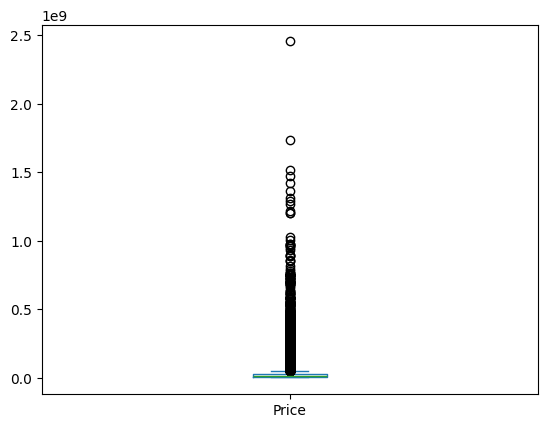

In [14]:
data['Price'].plot(kind='box')

<Axes: >

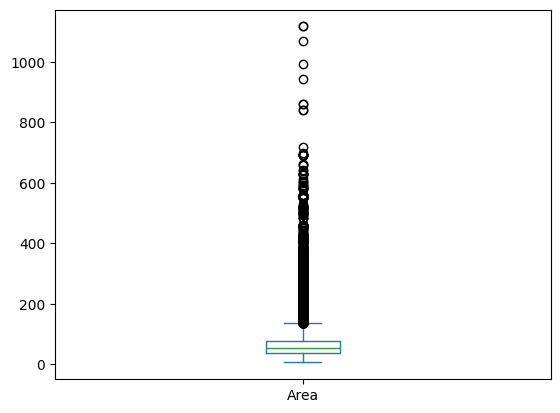

In [15]:
data['Area'].plot(kind='box')

Удалим строки, в которых значения **Price** и **Area** выходят за пределы квантилей 0.05 и 0.9


In [16]:
rows_to_drop = data[
    (data['Price'] > data['Price'].quantile(0.9)) | (data['Area'] > data['Area'].quantile(0.9))].index
data = data.drop(rows_to_drop)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19946 entries, 0 to 22674
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Price                                 19946 non-null  float64
 1   Minutes to metro                      19946 non-null  float64
 2   Number of rooms                       19946 non-null  float64
 3   Area                                  19946 non-null  float64
 4   Living area                           19946 non-null  float64
 5   Kitchen area                          19946 non-null  float64
 6   Floor                                 19946 non-null  float64
 7   Number of floors                      19946 non-null  int64  
 8   Apartment type_New building           19946 non-null  int64  
 9   Apartment type_Secondary              19946 non-null  int64  
 10  Region_Moscow                         19946 non-null  int64  
 11  Region_Moscow region

Снова выведем коробчатую диаграмму столбцов `Price` и `Mileage`

<Axes: >

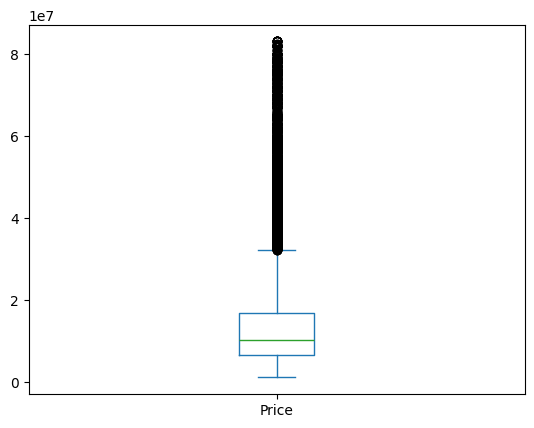

In [17]:
data['Price'].plot(kind='box')

<Axes: >

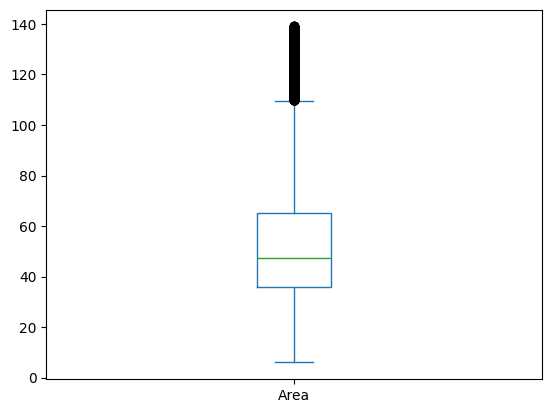

In [18]:
data['Area'].plot(kind='box')

Выведем статистическое описание столбцов

In [19]:
data.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Apartment type_New building,Apartment type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
count,1.994600e+04,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000,19946.000000
mean,1.493823e+07,12.123032,1.731074,52.680590,28.690895,10.947919,9.050637,16.500201,0.476035,0.523965,0.672014,0.327986,0.637571,0.077459,0.163140,0.121829
std,1.369091e+07,6.093629,1.247820,24.839766,15.419237,4.943588,6.898159,8.722951,0.499438,0.499438,0.469491,0.469491,0.480714,0.267325,0.369503,0.327096
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.687432e+06,8.000000,1.000000,35.700000,16.500000,8.200000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.028330e+07,12.000000,2.000000,47.200000,25.900000,10.200000,8.000000,16.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.689945e+07,16.000000,2.000000,65.300000,35.900000,12.600000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,8.300000e+07,60.000000,7.000000,139.000000,110.000000,85.000000,77.000000,97.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Построим некоторые графики для лучшего понимания общей картины

<Axes: xlabel='Price', ylabel='Area'>

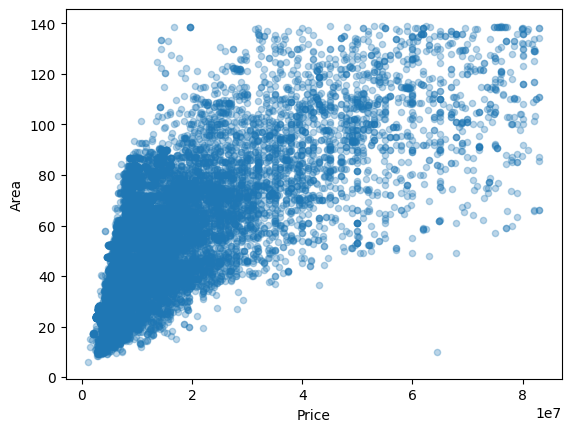

In [20]:
data.plot(kind="scatter", x="Price", y="Area", alpha=.3)

<Axes: xlabel='Price', ylabel='Minutes to metro'>

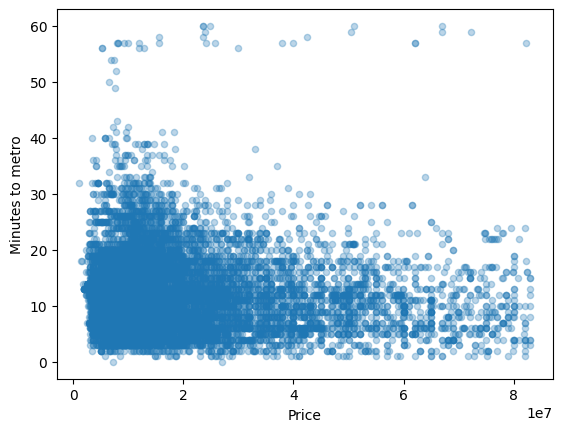

In [21]:
data.plot(kind="scatter", x="Price", y="Minutes to metro", alpha=.3)

<Axes: xlabel='Price', ylabel='Number of floors'>

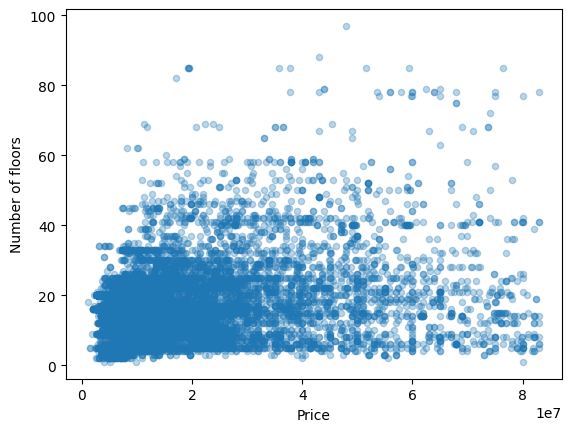

In [22]:
data.plot(kind="scatter", x="Price", y="Number of floors", alpha=.3)

<Axes: xlabel='Area', ylabel='Number of floors'>

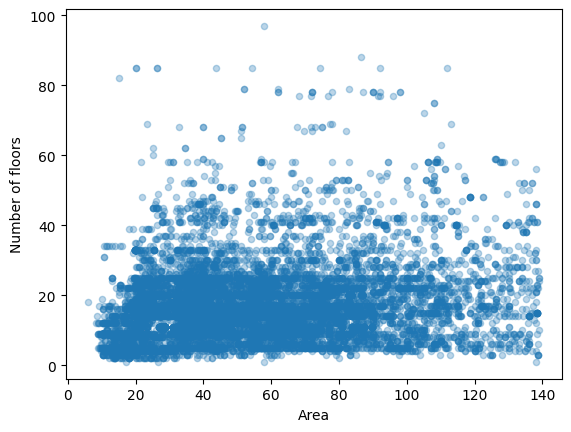

In [23]:
data.plot(kind = "scatter", x = "Area", y = "Number of floors", alpha=.3)

# Выведем среднее значение и разброс для каждого признака

In [24]:
mean_values = data.mean()
variance_values = data.var()

pd.set_option('display.float_format', '{:.2f}'.format)

summary_df = pd.DataFrame({
    "Mean": mean_values,
    "Variance": variance_values
})

print(summary_df)

                                            Mean           Variance
Price                                14938229.83 187440930219826.50
Minutes to metro                           12.12              37.13
Number of rooms                             1.73               1.56
Area                                       52.68             617.01
Living area                                28.69             237.75
Kitchen area                               10.95              24.44
Floor                                       9.05              47.58
Number of floors                           16.50              76.09
Apartment type_New building                 0.48               0.25
Apartment type_Secondary                    0.52               0.25
Region_Moscow                               0.67               0.22
Region_Moscow region                        0.33               0.22
Renovation_Cosmetic                         0.64               0.23
Renovation_Designer                         0.08

# Нормализация данных

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data_norm

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Apartment type_New building,Apartment type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,-0.63,-1.00,-0.59,-0.89,-1.14,-0.50,2.31,0.97,-0.95,0.95,-1.43,1.43,0.75,-0.29,-0.44,-0.37
1,-0.28,0.31,-0.59,-0.32,-0.81,0.44,0.14,0.97,-0.95,0.95,-1.43,1.43,0.75,-0.29,-0.44,-0.37
2,-0.62,-1.00,-0.59,-0.60,-0.87,-1.41,-0.59,-1.32,-0.95,0.95,-1.43,1.43,-1.33,-0.29,-0.44,2.68
3,-0.57,-1.00,-0.59,-0.57,-0.69,-0.60,-0.15,0.17,-0.95,0.95,-1.43,1.43,-1.33,-0.29,2.26,-0.37
4,-0.55,-0.18,-0.59,-0.79,-0.82,-0.60,-0.30,-1.09,-0.95,0.95,-1.43,1.43,-1.33,-0.29,2.26,-0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19941,-0.66,-0.68,-0.59,-0.34,-0.27,-0.13,-0.73,0.06,1.05,-1.05,-1.43,1.43,0.75,-0.29,-0.44,-0.37
19942,-0.74,-0.68,-1.39,-0.84,-1.02,-1.20,-0.73,0.06,1.05,-1.05,-1.43,1.43,0.75,-0.29,-0.44,-0.37
19943,-0.66,2.11,-0.59,-0.85,-1.21,0.25,0.28,-0.17,1.05,-1.05,-1.43,1.43,0.75,-0.29,-0.44,-0.37
19944,-0.82,2.93,-1.39,-1.40,-0.89,-0.58,1.15,0.06,1.05,-1.05,-1.43,1.43,0.75,-0.29,-0.44,-0.37


# Строим корреляционную матрицу

In [26]:
correlation_matrix = data_norm.corr()
correlation_matrix

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Apartment type_New building,Apartment type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
Price,1.00,-0.06,0.48,0.72,0.67,0.42,0.13,0.26,-0.47,0.47,0.41,-0.41,-0.54,0.32,0.17,0.34
Minutes to metro,-0.06,1.00,-0.04,-0.05,-0.04,-0.01,0.02,-0.05,-0.08,0.08,0.21,-0.21,-0.02,-0.00,-0.01,0.05
Number of rooms,0.48,-0.04,1.00,0.73,0.71,0.27,0.10,0.13,-0.09,0.09,0.07,-0.07,-0.08,0.02,0.07,0.02
Area,0.72,-0.05,0.73,1.00,0.91,0.53,0.14,0.18,-0.10,0.10,0.15,-0.15,-0.24,0.10,0.09,0.18
Living area,0.67,-0.04,0.71,0.91,1.00,0.29,0.08,0.11,-0.16,0.16,0.15,-0.15,-0.24,0.10,0.10,0.17
Kitchen area,0.42,-0.01,0.27,0.53,0.29,1.00,0.18,0.20,0.00,-0.00,0.12,-0.12,-0.14,0.07,0.02,0.13
Floor,0.13,0.02,0.10,0.14,0.08,0.18,1.00,0.51,0.09,-0.09,-0.03,0.03,-0.00,0.03,-0.07,0.06
Number of floors,0.26,-0.05,0.13,0.18,0.11,0.20,0.51,1.00,-0.08,0.08,-0.03,0.03,-0.16,0.08,0.01,0.16
Apartment type_New building,-0.47,-0.08,-0.09,-0.10,-0.16,0.00,0.09,-0.08,1.00,-1.00,-0.59,0.59,0.67,-0.28,-0.35,-0.36
Apartment type_Secondary,0.47,0.08,0.09,0.10,0.16,-0.00,-0.09,0.08,-1.00,1.00,0.59,-0.59,-0.67,0.28,0.35,0.36


# Визуализируем корреляционную матрицу


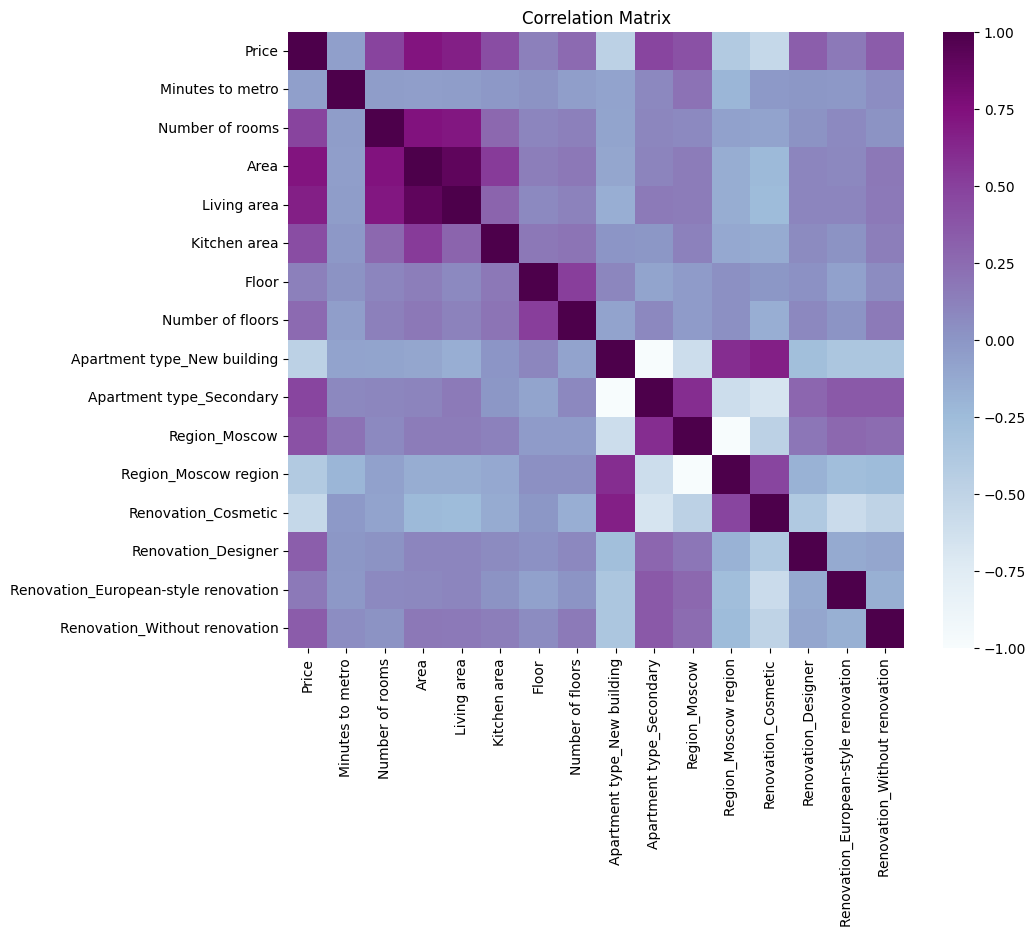

In [27]:
correlation_matrix = data_norm.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, square=True, cmap="BuPu")
plt.title("Correlation Matrix")
plt.show()

 # Запуск регрессии

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [28]:
from sklearn.model_selection import train_test_split

X = data_norm.drop(columns=['Price'])
y = data_norm['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14959, 15), (14959,), (4987, 15), (4987,))

## Линейная регрессия

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

RMSE_train, RMSE_test, R2_train, R2_test

(0.5009723385204267,
 0.5238256559110267,
 0.7397554602602494,
 0.7517495596413728)

## Метод  k  ближайших соседей ( k NN,  k  nearest neighbours)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsRegressor()

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5

R2_test  = r2_score(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)

RMSE_train, RMSE_test, R2_train, R2_test

(0.3353856579057258, 0.4399233242049757, 0.883361182868593, 0.824906318871416)

# Случайный лес (Random Forest)

In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_test_predict  = model.predict(X_test)
y_train_predict = model.predict(X_train)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

RMSE_train, RMSE_test, R2_train, R2_test

(0.1325857920506404,
 0.37433426723599883,
 0.9817716185726248,
 0.8732244023240702)

Как мы можем заметить, Случайный лес лучше всех справился с задачей регрессии, поэтому для него подберём новые гиперпараметры

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

n_arr = np.array([10, 50, 100, 150, 200])
ppl = Pipeline([('fit', RandomForestRegressor())])
params = {
    'fit__n_estimators': n_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

(-0.1343582316292653, {'fit__n_estimators': 200})

Text(0, 0.5, 'MSE')

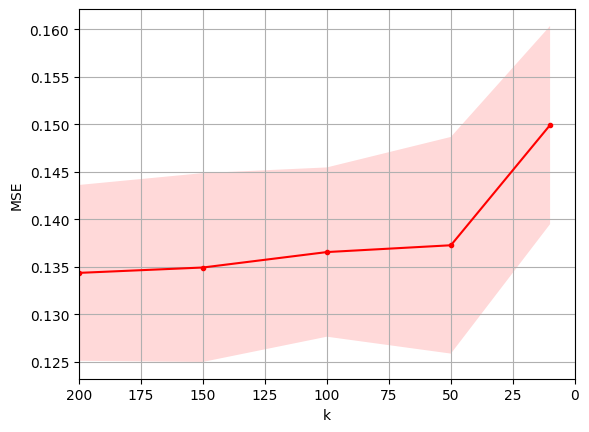

In [33]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(n_arr, MSE_arr, 'r.-')
plt.fill_between(n_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(n_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')

In [34]:
model.best_params_['fit__n_estimators']

200

RandomForestRegressor с вычисленным параметром

In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=model.best_params_['fit__n_estimators'])

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

RMSE_train, RMSE_test, R2_train, R2_test

(0.13048433110475163,
 0.3701862274990647,
 0.982344872428096,
 0.8760184644731368)

Получим оценки важности признаков. Чем значение больше, тем признак важнее

In [36]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

,0
Area,0.62
Renovation_Cosmetic,0.10
Number of floors,0.04
Living area,0.04
Minutes to metro,0.03
Kitchen area,0.03
Apartment type_Secondary,0.02
Floor,0.02
Apartment type_New building,0.02
Number of rooms,0.01


# График фактических значений против предсказанных

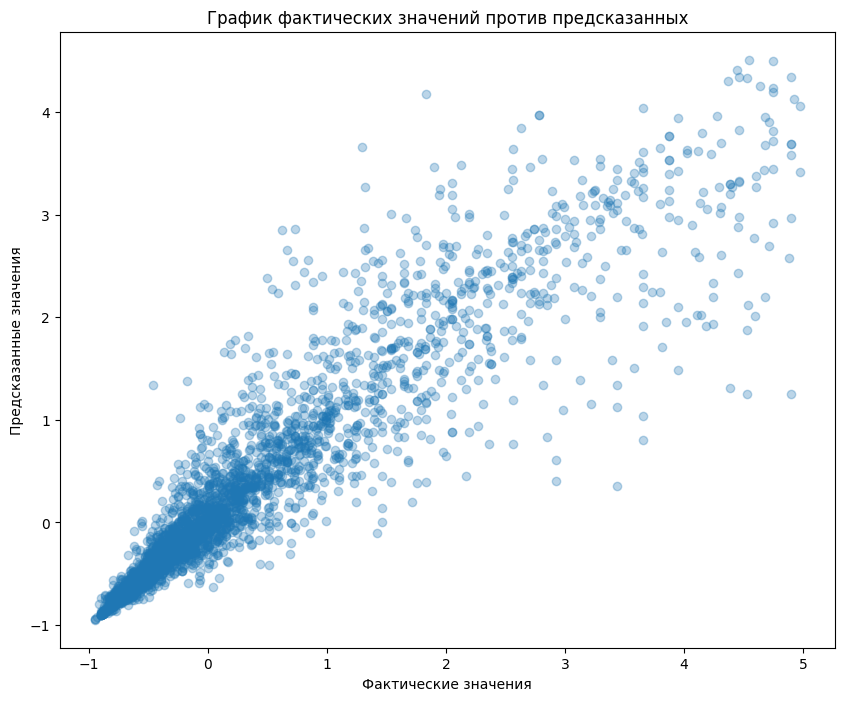

In [37]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_predict, alpha=0.3)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("График фактических значений против предсказанных")
plt.show()

# Вывод по лабораторной работе


### Анализ результатов регрессий по данным о ценах на квартиры в Москве
Я обучила три модели регрессии (линейная регрессия, kNN-регрессия и случайный лес) по данным о ценах на квартиры и получила следующие результаты:

### 1. Линейная регрессия (LinearRegression):
**RMSE_train**: 0.5009, **RMSE_test**: 0.5238

**R²_train**: 0.7398, **R²_test**: 0.7517

**Вывод**: Линейная регрессия показывает среднее качество предсказаний. Модель объясняет около 74.0% вариации данных на обучающей выборке и 75.2% на тестовой. Разница между R² на обучающей и тестовой выборках минимальна, что указывает на хорошую генерализацию модели, но её точность относительно низкая для данной задачи. Это может означать, что зависимость между признаками и ценами на квартиры имеет нелинейный характер.
### 2. kNN-регрессия (KNeighborsRegressor):
**RMSE_train**: 0.3354, **RMSE_test**: 0.4399

**R²_train**: 0.8834, **R²_test**: 0.8249

**Вывод**: kNN-регрессия значительно улучшает качество предсказаний по сравнению с линейной регрессией. Модель объясняет 88.3% вариации данных на обучающей выборке и 82.5% на тестовой, что указывает на хорошее качество предсказаний.  R² ближе к 1 говорит о том, что модель хорошо "объясняет" данные. Однако разница между обучающей и тестовой выборками намекает на некоторое переобучение.
### 3. Случайный лес (RandomForestRegressor):
**RMSE_train**: 0.1324, **RMSE_test**: 0.3732

**R²_train**: 0.9818, **R²_test**: 0.8740

**Вывод**: Случайный лес изначально показывает наилучшие результаты среди всех моделей. Модель объясняет 98.2% вариации данных на обучающей выборке, что указывает на почти идеальное предсказание. Значение R² на тестовой выборке (87.4%) тоже достаточно высокое, но присутствует некоторое переобучение.
### 4. Случайный лес (после вычисления гиперпараметра):
**RMSE_train**: 0.1296, **RMSE_test**: 0.3702

**R²_train**: 0.9826, **R²_test**: 0.8760

**Вывод**: Подбор гиперпараметра n_estimators привёл к небольшому улучшению производительности модели. R² на обучающей выборке увеличилось до 98.3%, а на тестовой до 87.6%, что свидетельствует о высоком качестве предсказаний. Модель продолжает демонстрировать высокую эффективность и хорошую генерализацию.
### Заключение:
Случайный лес является самой точной моделью, особенно после оптимизации гиперпараметров. Она обеспечивает отличное качество предсказаний, что делает её предпочтительной для данной задачи.
kNN-регрессия показывает хорошие результаты, но уступает случайному лесу как в точности, так и в способности обобщать данные.
Линейная регрессия оказалась наименее точной, что может быть связано с тем, что данные содержат сложные нелинейные зависимости, которые эта модель не может достаточно хорошо описать.

# Кластеризация


Задача: Подчистить и исправить все, что было сделано в домашнем задании для 2 ноября. С теми же данными - решить задачу кластеризации 3 методами: KMeans, DBSCAN и любым другим на ваш выбор. В задаче обучения с учителем вы не должны использовать целевую метку y. В случае задачи классификации сравнить выход каждого алгоритма кластеризации с истинными метками. Сделать выводы.

In [38]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Кластеризация методом KMeans

Подбор гиперпараметров для KMeans

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


parameters = {'n_clusters': list(range(2, 15))}
km = KMeans()
clf = GridSearchCV(km, parameters)
clf.fit(X)
clusters_kmeans = clf.best_params_['n_clusters']
clf.best_params_

{'n_clusters': 14}

Вычисление силуэтного коэффициента для KMeans

In [40]:
kmeans = KMeans(n_clusters=clusters_kmeans, random_state=42)
data_norm['KMeans_Cluster'] = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, data_norm['KMeans_Cluster'])
print(f"Силуэтный коэффициент для KMeans: {silhouette_kmeans}")

Силуэтный коэффициент для KMeans: 0.270779498028834


Визуализируем средний силуэтный коэффициент для каждого кластера KMeans

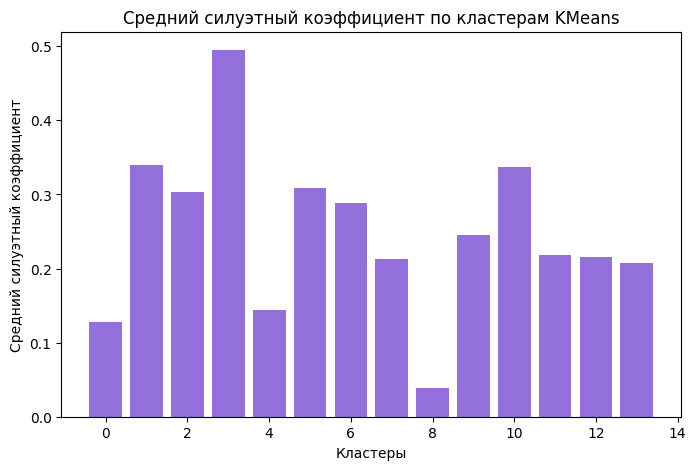

In [41]:
labels = kmeans.labels_
silhouette_vals = silhouette_samples(X, labels)

n_clusters = len(set(labels))
silhouette_means = [np.mean(silhouette_vals[labels == i]) for i in range(n_clusters)]

plt.figure(figsize=(8, 5))
plt.bar(range(n_clusters), silhouette_means, color='mediumpurple')
plt.xlabel('Кластеры')
plt.ylabel('Средний силуэтный коэффициент')
plt.title('Средний силуэтный коэффициент по кластерам KMeans')
plt.show()

Визуализируем кластеры KMeans

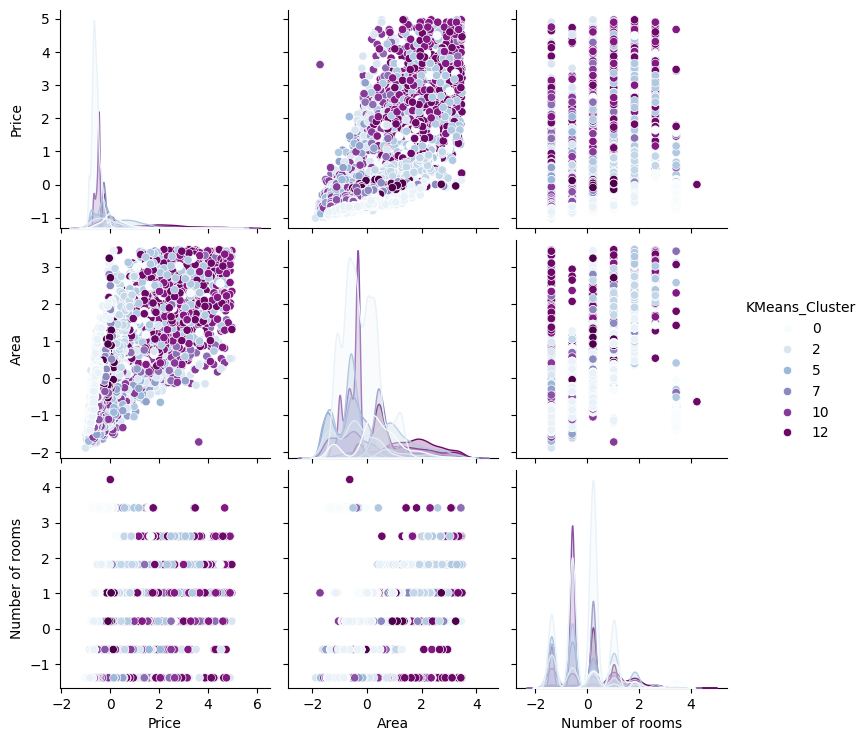

In [42]:
sns.pairplot(data_norm, vars=['Price', 'Area', 'Number of rooms'], hue='KMeans_Cluster', palette='BuPu')
plt.show()

Как можно увидеть, кластеризация выполнилась не совсем удачно, кластеры много пересекаются и не находятся в конкретных областях

### Кластеризация методом DBSCAN

Эмпирически подберём гиперпараметры  и вычислим значение силуэтного коэффициента для DBSCAN

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.0, min_samples=25)
data_norm['DBSCAN_Cluster'] = dbscan.fit_predict(X)
silhouette_dbscan = silhouette_score(X, data_norm['DBSCAN_Cluster'])
print(f"Силуэтный коэффициент для DBSCAN: {silhouette_dbscan}")

Силуэтный коэффициент для DBSCAN: 0.2930625577069219


Визуализируем средний силуэтный коэффициент для каждого кластера DBSCAN

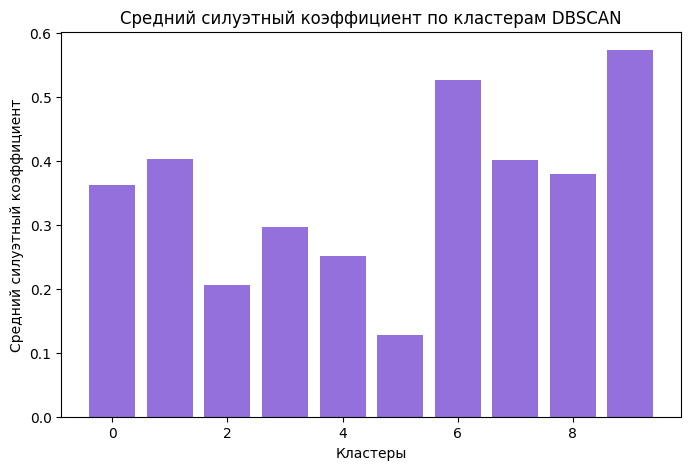

In [44]:
labels = dbscan.labels_
silhouette_vals = silhouette_samples(X, labels)

unique_labels = set(labels)
unique_labels.discard(-1)

n_clusters = len(unique_labels)
silhouette_means = []

for i in unique_labels:
    cluster_vals = silhouette_vals[labels == i]
    if len(cluster_vals) > 0:
        silhouette_means.append(np.mean(cluster_vals))
    else:
        silhouette_means.append(np.nan)

plt.figure(figsize=(8, 5))
plt.bar(range(n_clusters), silhouette_means, color='mediumpurple')
plt.xlabel('Кластеры')
plt.ylabel('Средний силуэтный коэффициент')
plt.title('Средний силуэтный коэффициент по кластерам DBSCAN')
plt.show()

Теперь визуализируем кластеры DBSCAN

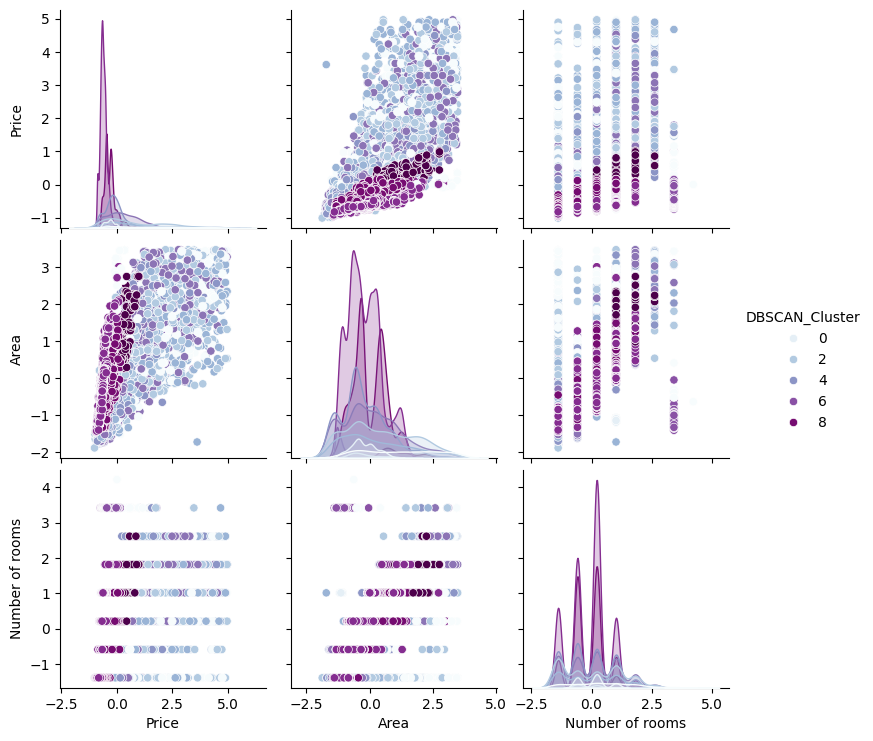

In [45]:
sns.pairplot(data_norm, vars=['Price', 'Area', 'Number of rooms'], hue='DBSCAN_Cluster', palette='BuPu')
plt.show()

На этих графиках мы можем увидеть разделение данных, находящихся в одной области, на одни и те же кластеры

## Кластеризация методом Gaussian Mixture Model

Подбор гиперпараметров для GMM

In [46]:
from sklearn.mixture import GaussianMixture

parameters = {'n_components': list(range(5, 10))}
gm = GaussianMixture()
clf = GridSearchCV(gm, parameters)
clf.fit(X)
components_gmm = clf.best_params_['n_components']
clf.best_params_

{'n_components': 8}

Вычисление силуэтного коэффициента для GMM

In [47]:
gmm = GaussianMixture(n_components=components_gmm, random_state=42)
data_norm['GMM_Cluster'] = gmm.fit_predict(X)
silhouette_gmm = silhouette_score(X, data_norm['GMM_Cluster'])
print(f"Силуэтный коэффициент для GMM: {silhouette_gmm}")

Силуэтный коэффициент для GMM: 0.2900188355704501


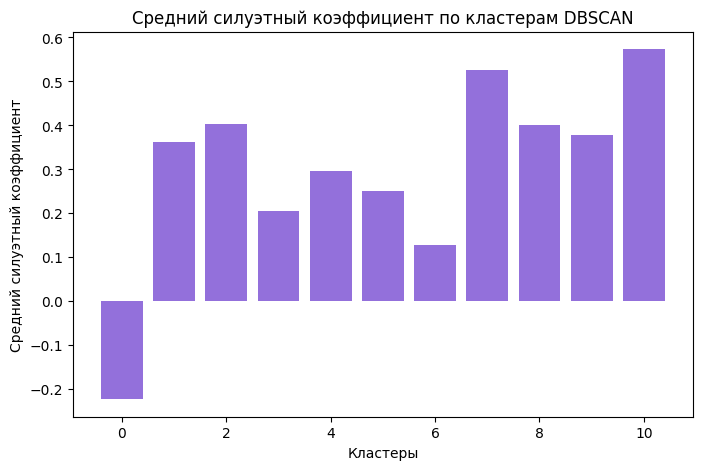

In [48]:
silhouette_vals = silhouette_samples(X, labels)

unique_labels = np.unique(labels)
n_clusters = len(unique_labels)

silhouette_means = []
for i in unique_labels:
    cluster_vals = silhouette_vals[labels == i]
    if len(cluster_vals) > 0:
        silhouette_means.append(np.mean(cluster_vals))
    else:
        silhouette_means.append(np.nan)

plt.figure(figsize=(8, 5))
plt.bar(range(n_clusters), silhouette_means, color='mediumpurple')
plt.xlabel('Кластеры')
plt.ylabel('Средний силуэтный коэффициент')
plt.title('Средний силуэтный коэффициент по кластерам DBSCAN')
plt.show()

Визуализируем кластеры GMM

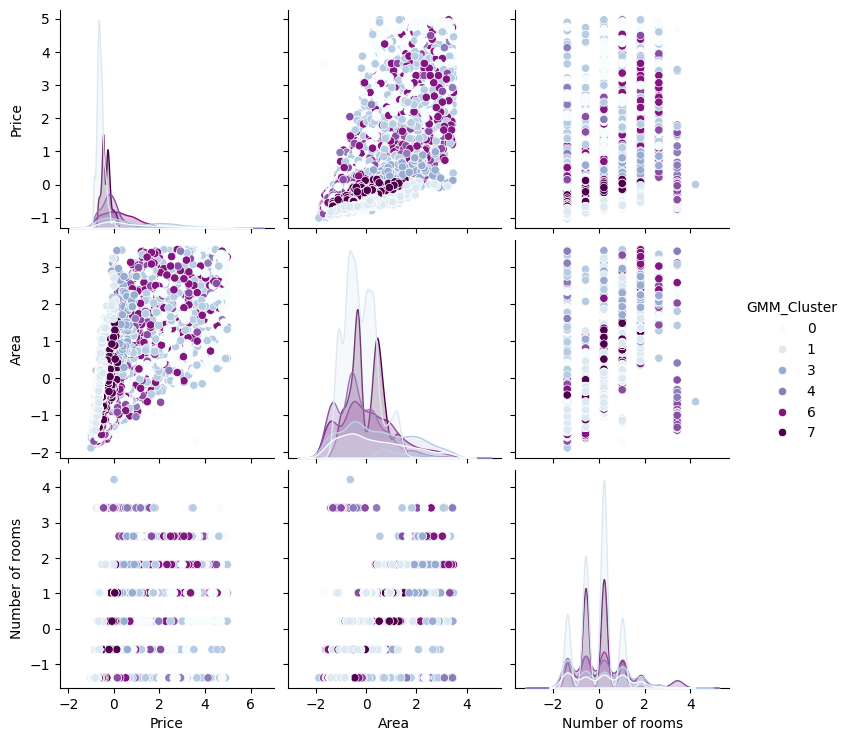

In [49]:
sns.pairplot(data_norm, vars=['Price', 'Area', 'Number of rooms'], hue='GMM_Cluster', palette='BuPu')
plt.show()

Графики схожи с кластеризацией у DBSCAN

### Вывод на основе силуэтных коэффициентов:
#### 1) KMeans (0.2708):
Алгоритм показал низкий силуэтный коэффициент, что свидетельствует о слабой разнице между расстоянием внутри кластеров и расстоянием между кластерами. Это может означать, что точки данных плохо сгруппированы или кластеры перекрываются.

#### 2) DBSCAN (0.2931):
DBSCAN показал наивысший силуэтный коэффициент среди всех методов, но значение всё равно остаётся ниже порога, который можно считать хорошим (обычно больше 0.5). Это указывает на то, что кластеры не имеют чётких границ или данные содержат шум, который влияет на результат.

#### 3) GMM (0.2900):
Gaussian Mixture Model показал результат, схожий с DBSCAN, и чуть лучше, чем KMeans. Несмотря на это, значение силуэтного коэффициента остаётся невысоким, что говорит о наличии пересечения между кластерами или слабой плотности групп.

#### Общий вывод:
Значения силуэтного коэффициента для всех трёх методов находятся в диапазоне 0.27–0.29, что свидетельствует о неудовлетворительном качестве кластеризации. Это может быть связано с характеристиками данных, такими как сложная структура кластеров, их пересечение или наличие шума.
Наивысший силуэтный коэффициент у DBSCAN (0.2931), что указывает на его лучшую адаптацию к данным по сравнению с другими методами.